Importing the dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_credit = pd.read_csv(r'C:\Users\Gian\Documents\Coding\ML_Basics\Naive_Bayes\credit_risk_dataset.csv')

In [4]:
df_credit.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [5]:
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


Checking for non existent values

In [6]:
df_credit[df_credit['person_age'] < 0]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length


Checking for null values

In [7]:
df_credit.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

<AxesSubplot:>

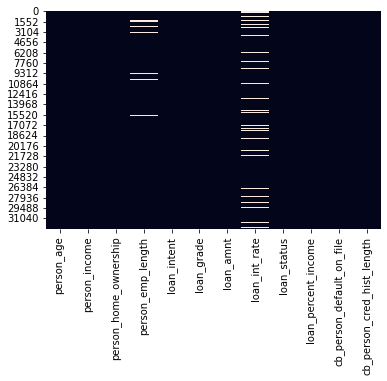

In [8]:
sns.heatmap(df_credit.isnull(), cbar=False)


The total of null data represents about 10% of the whole dataset, so it's ok to delete it

In [9]:
df_credit.dropna(axis=1,inplace=True)

In [10]:
df_credit.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

Checking the values of certain columns for labelling

In [11]:
values_unique = ['person_home_ownership','loan_intent','loan_grade', 'cb_person_default_on_file']

for i in range(0,3):
    print(df_credit[values_unique[i]].value_counts())

RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: person_home_ownership, dtype: int64
EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: loan_intent, dtype: int64
A    10777
B    10451
C     6458
D     3626
E      964
F      241
G       64
Name: loan_grade, dtype: int64


In [20]:
df_credit[values_unique].nunique()

person_home_ownership        4
loan_intent                  6
loan_grade                   7
cb_person_default_on_file    2
dtype: int64

Labelling the columns with only 2 values with binary and the other ones with LabelEncoder 

In [21]:
from sklearn.preprocessing import LabelEncoder

In [24]:
df_credit["cb_person_default_on_file"].replace({"N": 0, "Y": 1}, inplace=True)


In [26]:
label_encoder_person_home_ownership = LabelEncoder()
label_encoder_loan_intent = LabelEncoder()
label_encoder_loan_grade = LabelEncoder()

In [27]:
df_credit['person_home_ownership'] = label_encoder_person_home_ownership.fit_transform(df_credit['person_home_ownership'])
df_credit['loan_intent'] = label_encoder_loan_intent.fit_transform(df_credit['loan_intent'])
df_credit['loan_grade'] = label_encoder_loan_grade.fit_transform(df_credit['loan_grade'])

In [28]:
df_credit

,person_age,person_income,person_home_ownership,loan_intent,loan_grade,loan_amnt,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,3,4,3,35000,1,0.59,1,3
1,21,9600,2,1,1,1000,0,0.10,0,2
2,25,9600,0,3,2,5500,1,0.57,0,3
3,23,65500,3,3,2,35000,1,0.53,0,2
4,24,54400,3,3,2,35000,1,0.55,1,4
...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,0,4,2,5800,0,0.11,0,30
32577,54,120000,0,4,0,17625,0,0.15,0,19
32578,65,76000,3,2,1,35000,1,0.46,0,28
32579,56,150000,0,4,1,15000,0,0.10,0,26


Splitting the model into train and test

In [36]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [56]:
X_train, X_test, y_train, y_test = train_test_split(df_credit.drop('loan_status', axis=1),df_credit['loan_status'], test_size=0.3)

Training the model

In [57]:
model = GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

Evaluating the model

In [58]:
y_pred = model.predict(X_test)

In [54]:
from sklearn import metrics

In [59]:
print(metrics.accuracy_score(y_test,y_pred))

0.7933503836317135
